#LetsGrowMore Data Science Virtual Internship

#Author - **Rupak Dey**

#Level 01 : **Begineer**

#Task 02 : **Stock Market Prediction and Forecasting using Stacked LSTM**

In [ ]:
#Importing the Libraries
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")#Importing the dataset
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [ ]:
df1=df.reset_index()['Close']

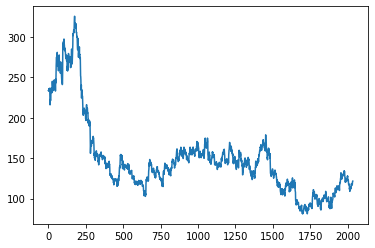

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)#Plotting the close price column

In [ ]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [ ]:
df1

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))#Normalizing the values

In [ ]:
print(df1)

[[0.62418301]
 [0.62214052]
 [0.62622549]
 ...
 [0.1621732 ]
 [0.16319444]
 [0.16584967]]


In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(1322, 713)

In [ ]:
train_data.shape

(1322, 1)

In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(1221, 100)
(1221,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(612, 100)
(612,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
20/20 [==============================] - 12s 151ms/step - loss: 0.0341 - val_loss: 0.0048
Epoch 2/100
20/20 [==============================] - 2s 80ms/step - loss: 0.0027 - val_loss: 8.4087e-04
Epoch 3/100
20/20 [==============================] - 2s 81ms/step - loss: 0.0018 - val_loss: 0.0012
Epoch 4/100
20/20 [==============================] - 2s 81ms/step - loss: 0.0019 - val_loss: 9.3885e-04
Epoch 5/100
20/20 [==============================] - 2s 81ms/step - loss: 0.0018 - val_loss: 0.0013
Epoch 6/100
20/20 [==============================] - 2s 80ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch 7/100
20/20 [==============================] - 2s 82ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 8/100
20/20 [==============================] - 2s 80ms/step - loss: 0.0015 - val_loss: 9.1473e-04
Epoch 9/100
20/20 [==============================] - 2s 82ms/step - loss: 0.0018 - val_loss: 8.4880e-04
Epoch 10/100
20/20 [==============================] - 2s 82ms/step - loss: 0.0015 

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.6.0'

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

169.9448092602714

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

117.88901483104006

<function matplotlib.pyplot.show>

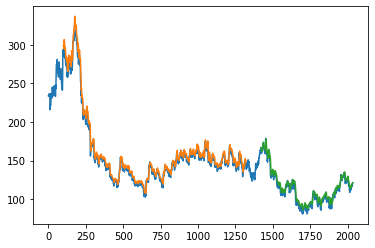

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show

In [ ]:
len(test_data)

713

In [ ]:
x_input=test_data[613:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
from numpy import array

lst_output = []
n_steps = 100
i=0
while(i<30):

  if(len(temp_input)>100):
    
      #print(temp_input)
      x_input=np.array(temp_input[1:])
      print("{} day input {}".format(i,x_input))
      x_input=x_input.reshape(1,-1)
      x_input = x_input.reshape((1, n_steps, 1))
      #print(x_input)

      yhat = model.predict(x_input, verbose=0)
      print("{} day output {}".format(i,yhat))
      temp_input.extend(yhat[0].tolist())
      temp_input=temp_input[1:]
      #print(temp_input)
      lst_output.extend(yhat.tolist())
      i=i+1
  else:
      x_input = x_input.reshape((1, n_steps,1))
      yhat = model.predict(x_input, verbose=0)
      print(yhat[0])
      temp_input.extend(yhat[0].tolist())
      print(len(temp_input))
      lst_output.extend(yhat.tolist())
      i=i+1

print(lst_output)

0 day input [0.18913399 0.18954248 0.19403595 0.19444444 0.20200163 0.19771242
 0.19934641 0.19873366 0.1997549  0.2128268  0.21568627 0.20445261
 0.21772876 0.21098856 0.21425654 0.19750817 0.18811275 0.17851307
 0.17381536 0.16033497 0.16564542 0.17116013 0.17422386 0.18035131
 0.17401961 0.16278595 0.16973039 0.17810458 0.17034314 0.16830065
 0.17279412 0.17544935 0.18382353 0.19138072 0.18913399 0.19097222
 0.17238562 0.16830065 0.1693219  0.17177288 0.16156046 0.14971405
 0.1503268  0.15196078 0.14726307 0.14501634 0.14603758 0.12479575
 0.13112745 0.11397059 0.1190768  0.12377451 0.13562092 0.12908497
 0.13459967 0.12806373 0.13031046 0.12724673 0.13521242 0.14522059
 0.15257353 0.14848856 0.14338235 0.14562908 0.15236928 0.15400327
 0.14971405 0.1621732  0.16319444 0.16584967 0.17082648 0.17482139
 0.17895198 0.18310773 0.18722911 0.19128868 0.19527657 0.19919282
 0.2030437  0.20683925 0.21059139 0.21431258 0.2180147  0.22170812
 0.22540149 0.2291017  0.23281358 0.23654069 0.240

In [ ]:
x_input = x_input.reshape((1, 100,1))
x_input.shape

(1, 100, 1)

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
len(df1)

2035

In [ ]:
df1.shape

(2035, 1)

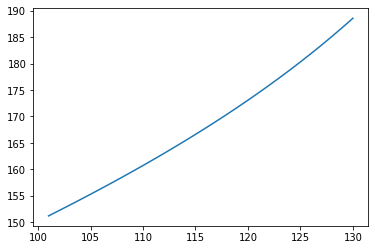

In [ ]:
plt.plot(day_pred,scaler.inverse_transform(lst_output))

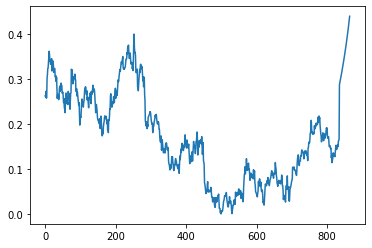

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

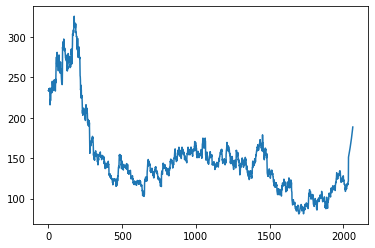

In [ ]:
plt.plot(df3)